# Face Recognition Example

In this example, we show how the MAX-Facial-Recognizer model can be used to recognize faces. 

## Content of this demo

We first use an example image to check that the REST API works, and then visualize the three test images, two of which are for Paul Rudd and one is for Chris Pratt. These images are passed to the  MAX-Facial-Recognizer model to get their embedding vectors. Based on these vectors, we can identify whether two images belong to a same person or not.




In [1]:
%%bash
# Install the required packages
pip install -q numpy scipy matplotlib Pillow requests 

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import requests

In [3]:
url = 'http://localhost:5000/model/predict'

def facenet(input_img):
    """
    Takes in input image file path and generates face embeddings/bboxes.
    """
    files = {'image': ('image.jpg',open(input_img,'rb'), 'images/jpeg')}
    r = requests.post(url, files=files).json()
    
    return r

In [15]:
def same_person(img1, img2, threshold=0.95):
    """
    Determines if two images belong to the same face/person.
    """
    emb1 = facenet(img1)['predictions'][0]['embedding']
    emb2 = facenet(img2)['predictions'][0]['embedding']
    
    return np.linalg.norm(np.asarray(emb1)-np.asarray(emb2)) <= threshold

In [5]:
##Sanity check that it works
preds = facenet('assets/Lenna.jpg')
print(preds['status'])

ok


In [6]:
paul1 = 'assets/Paul.jpeg'
paul2 = 'assets/Paul2.jpeg'
chris = 'assets/Chris.jpeg'

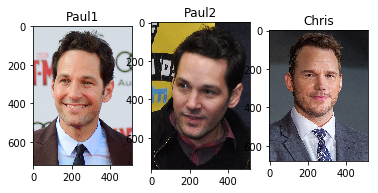

In [7]:
##Visualize the test images
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(plt.imread(paul1))
plt.title("Paul1")
plt.subplot(1, 3, 2)
plt.imshow(plt.imread(paul2))
plt.title("Paul2")
plt.subplot(1, 3, 3)
plt.imshow(plt.imread(chris))
plt.title("Chris")
plt.show()

In [17]:
# Check if these two images belong to a same person
print(same_person(paul1,paul2))

True


In [18]:
print(same_person(paul1,chris))

False


In [19]:
print(same_person(paul2,chris))

False
